**Task Three : Analyzing Pizza Sales Data**

In [1]:
#Importing Libaries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

*Importing the Datasets*

In [3]:
data = pd.read_csv("data_dictionary.csv")
df = pd.read_csv("order_details.csv")
df2 = pd.read_csv("orders.csv")
df3 = pd.read_csv("pizza_types.csv", encoding="latin1")
df4 = pd.read_csv("pizzas.csv", encoding="latin1")



*Checking the datasets, (size and info)*

In [5]:
data.head()

,Table,Field,Description
0,orders,order_id,Unique identifier for each order placed by a t...
1,orders,date,Date the order was placed (entered into the sy...
2,orders,time,Time the order was placed (entered into the sy...
3,order_details,order_details_id,Unique identifier for each pizza placed within...
4,order_details,order_id,Foreign key that ties the details in each orde...


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Table        15 non-null     object
 1   Field        15 non-null     object
 2   Description  15 non-null     object
dtypes: object(3)
memory usage: 492.0+ bytes


In [ ]:
df.head()

,order_details_id,order_id,pizza_id,quantity
0,1,1,hawaiian_m,1
1,2,2,classic_dlx_m,1
2,3,2,five_cheese_l,1
3,4,2,ital_supr_l,1
4,5,2,mexicana_m,1


In [8]:
df.shape

(48620, 4)

In [ ]:
df2.head()

,order_id,date,time
0,1,2015-01-01,11:38:36
1,2,2015-01-01,11:57:40
2,3,2015-01-01,12:12:28
3,4,2015-01-01,12:16:31
4,5,2015-01-01,12:21:30


In [10]:
df.shape

(48620, 4)

In [ ]:
df3.head()


,pizza_type_id,name,category,ingredients
0,bbq_ckn,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."
1,cali_ckn,The California Chicken Pizza,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ..."
2,ckn_alfredo,The Chicken Alfredo Pizza,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A..."
3,ckn_pesto,The Chicken Pesto Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Spinach, Garli..."
4,southw_ckn,The Southwest Chicken Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Red Onions, Ja..."


In [12]:
df3.shape

(32, 4)

In [ ]:
df4.head()

,pizza_id,pizza_type_id,size,price
0,bbq_ckn_s,bbq_ckn,S,12.75
1,bbq_ckn_m,bbq_ckn,M,16.75
2,bbq_ckn_l,bbq_ckn,L,20.75
3,cali_ckn_s,cali_ckn,S,12.75
4,cali_ckn_m,cali_ckn,M,16.75


In [4]:
df4.shape

(96, 4)

*Join Datasets*

In [ ]:
#Joining the pizza table on the pizza type id column 
df_pizzas = pd.merge(df3,df4, on='pizza_type_id', how='outer')

df_pizzas

,pizza_type_id,name,category,ingredients,pizza_id,size,price
0,bbq_ckn,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",bbq_ckn_s,S,12.75
1,bbq_ckn,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",bbq_ckn_m,M,16.75
2,bbq_ckn,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",bbq_ckn_l,L,20.75
3,big_meat,The Big Meat Pizza,Classic,"Bacon, Pepperoni, Italian Sausage, Chorizo Sau...",big_meat_s,S,12.00
4,big_meat,The Big Meat Pizza,Classic,"Bacon, Pepperoni, Italian Sausage, Chorizo Sau...",big_meat_m,M,16.00
...,...,...,...,...,...,...,...
91,the_greek,The Greek Pizza,Classic,"Kalamata Olives, Feta Cheese, Tomatoes, Garlic...",the_greek_xl,XL,25.50
92,the_greek,The Greek Pizza,Classic,"Kalamata Olives, Feta Cheese, Tomatoes, Garlic...",the_greek_xxl,XXL,35.95
93,veggie_veg,The Vegetables + Vegetables Pizza,Veggie,"Mushrooms, Tomatoes, Red Peppers, Green Pepper...",veggie_veg_s,S,12.00
94,veggie_veg,The Vegetables + Vegetables Pizza,Veggie,"Mushrooms, Tomatoes, Red Peppers, Green Pepper...",veggie_veg_m,M,16.00


In [8]:
#Joining the orders table on the order id column
df_orders = pd.merge(df,df2, on='order_id', how='outer')

In [9]:
df_orders

,order_details_id,order_id,pizza_id,quantity,date,time
0,1,1,hawaiian_m,1,2015-01-01,11:38:36
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40
2,3,2,five_cheese_l,1,2015-01-01,11:57:40
3,4,2,ital_supr_l,1,2015-01-01,11:57:40
4,5,2,mexicana_m,1,2015-01-01,11:57:40
...,...,...,...,...,...,...
48615,48616,21348,ckn_alfredo_m,1,2015-12-31,21:23:10
48616,48617,21348,four_cheese_l,1,2015-12-31,21:23:10
48617,48618,21348,napolitana_s,1,2015-12-31,21:23:10
48618,48619,21349,mexicana_l,1,2015-12-31,22:09:54


In [18]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   order_details_id  48620 non-null  int64 
 1   order_id          48620 non-null  int64 
 2   pizza_id          48620 non-null  object
 3   quantity          48620 non-null  int64 
 4   date              48620 non-null  object
 5   time              48620 non-null  object
dtypes: int64(3), object(3)
memory usage: 2.2+ MB


In [19]:
df_pizzas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   pizza_type_id  96 non-null     object 
 1   name           96 non-null     object 
 2   category       96 non-null     object 
 3   ingredients    96 non-null     object 
 4   pizza_id       96 non-null     object 
 5   size           96 non-null     object 
 6   price          96 non-null     float64
dtypes: float64(1), object(6)
memory usage: 5.4+ KB


In [10]:
#Joined the pizza and orders table on the common pizza id column
# #Final Dataset with all the tables
final_df = pd.merge(df_orders,df_pizzas, on='pizza_id', how='outer')

In [11]:
final_df.head()

,order_details_id,order_id,pizza_id,quantity,date,time,pizza_type_id,name,category,ingredients,size,price
0,26.0,11.0,bbq_ckn_l,1.0,2015-01-01,13:02:59,bbq_ckn,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",L,20.75
1,43.0,17.0,bbq_ckn_l,1.0,2015-01-01,13:53:00,bbq_ckn,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",L,20.75
2,71.0,27.0,bbq_ckn_l,1.0,2015-01-01,15:11:17,bbq_ckn,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",L,20.75
3,83.0,33.0,bbq_ckn_l,1.0,2015-01-01,15:54:08,bbq_ckn,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",L,20.75
4,123.0,51.0,bbq_ckn_l,1.0,2015-01-01,18:48:28,bbq_ckn,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",L,20.75


In [12]:
#Saves our final dataset as a csv file
final_df.to_csv("final_df", index=False)

In [23]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48625 entries, 0 to 48624
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_details_id  48620 non-null  float64
 1   order_id          48620 non-null  float64
 2   pizza_id          48625 non-null  object 
 3   quantity          48620 non-null  float64
 4   date              48620 non-null  object 
 5   time              48620 non-null  object 
 6   pizza_type_id     48625 non-null  object 
 7   name              48625 non-null  object 
 8   category          48625 non-null  object 
 9   ingredients       48625 non-null  object 
 10  size              48625 non-null  object 
 11  price             48625 non-null  float64
dtypes: float64(4), object(8)
memory usage: 4.5+ MB


In [24]:
final_df.head()

,order_details_id,order_id,pizza_id,quantity,date,time,pizza_type_id,name,category,ingredients,size,price
0,26.0,11.0,bbq_ckn_l,1.0,2015-01-01,13:02:59,bbq_ckn,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",L,20.75
1,43.0,17.0,bbq_ckn_l,1.0,2015-01-01,13:53:00,bbq_ckn,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",L,20.75
2,71.0,27.0,bbq_ckn_l,1.0,2015-01-01,15:11:17,bbq_ckn,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",L,20.75
3,83.0,33.0,bbq_ckn_l,1.0,2015-01-01,15:54:08,bbq_ckn,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",L,20.75
4,123.0,51.0,bbq_ckn_l,1.0,2015-01-01,18:48:28,bbq_ckn,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",L,20.75


*Performing  Data Cleaning*

In [25]:
#Checking for missing values 
final_df.isna().sum()

order_details_id    5
order_id            5
pizza_id            0
quantity            5
date                5
time                5
pizza_type_id       0
name                0
category            0
ingredients         0
size                0
price               0
dtype: int64

In [13]:
#Checking for duplicated items
final_df.duplicated().sum()

np.int64(0)

In [14]:
#Drop null/missing  nalues 
final_df.dropna(inplace=True)

**Analyzing the Data**

In [18]:
#Total for each row 
final_df["Total"] = final_df["price"] * final_df["quantity"]

In [21]:
#Total Revenue 
total_revenue = final_df["Total"].sum().round()
#Total quantity sold 
total_quantity = final_df["quantity"].sum()
#Total Orders
total_orders = final_df["order_id"].nunique()
#Number of pizza types sold 
piza_types = final_df["pizza_type_id"].nunique()
#Average price of the pizzas
avg_price = final_df["price"].mean()

#Prints results
print(f"Total Revenue: {total_revenue}")
print(f"Total Quantity Sold: {total_quantity}")
print(f"Total Orders: {total_orders}")
print(f"Pizza Types Sold: {piza_types}")
print(f"Average of Pizza Prics: {avg_price}")

Total Revenue: 817860.0
Total Quantity Sold: 49574.0
Total Orders: 21350
Pizza Types Sold: 32
Average of Pizza Prics: 16.494132044426163


*Peak Hours and Daily Trends*

In [22]:
 #Converting date nd time to datetime format
final_df["Datetime"] = pd.to_datetime(final_df["time"] +" " + final_df["date"])

In [ ]:
#Extracting hourly,daily and monthly data
final_df["Hour"] = final_df["Datetime"].dt.hour
final_df["Day_of_Week"] = final_df["Datetime"].dt.day_name()
final_df["Month"] = final_df["Datetime"].dt.month_name()

#Peak hours of sales 
hourly_sales = final_df.groupby("Hour")["Total"].sum().sort_values(ascending=False)

#Total Sales per day
daily_sales = final_df.groupby("Day_of_Week")["Total"].sum().sort_values(ascending=False)

print(f"Hourly Sales:{hourly_sales}")
print(f"Total Sales per Day:{daily_sales}")

Hourly Sales:Hour
12    111877.90
13    106065.70
18     89296.85
17     86237.45
19     72628.90
16     70055.40
14     59201.40
20     58215.40
15     52992.30
11     44935.80
21     42029.80
22     22815.15
23      1121.35
10       303.65
9         83.00
Name: Total, dtype: float64
Total Sales per Day:Day_of_Week
Friday       136073.90
Thursday     123528.50
Saturday     123182.40
Wednesday    114408.40
Tuesday      114133.80
Monday       107329.55
Sunday        99203.50
Name: Total, dtype: float64


Based on the hourly sales analysis, the peak sales period occurs between **12:00 PM and 4:00 PM (12–16 hours)** ,with **12:00 PM showing the highest sales**. Examining sales by day, **Friday records the highest total sales**, followed closely by Thursday and Saturday. This indicates that **midday hours and Fridays are the most profitable periods**.

*Best Sellers and Underperformers*

In [45]:
#Top 5 pizzas by quantity sold 
top5_quantity = final_df.groupby("name")['quantity'].sum().sort_values(ascending=False).head(5)

#Top selling pizzas by revenue 
top5_revenue = final_df.groupby("name")['Total'].sum().sort_values(ascending=False).head(5)

#Bottom Sellers (underperformers)
bottom_pizzas = final_df.groupby("name")['quantity'].sum().sort_values().head(5)

print(f"Top 5 pizzas according Quantity: {top5_quantity}")
print(f"Top Selling Pizzas according to Revenue: {top5_revenue}")
print(f"Least sold(bad market pizzas): {bottom_pizzas}")

Top 5 pizzas according Quantity: name
The Classic Deluxe Pizza      2453.0
The Barbecue Chicken Pizza    2432.0
The Hawaiian Pizza            2422.0
The Pepperoni Pizza           2418.0
The Thai Chicken Pizza        2371.0
Name: quantity, dtype: float64
Top Selling Pizzas according to Revenue: name
The Thai Chicken Pizza          43434.25
The Barbecue Chicken Pizza      42768.00
The California Chicken Pizza    41409.50
The Classic Deluxe Pizza        38180.50
The Spicy Italian Pizza         34831.25
Name: Total, dtype: float64
Least sold(bad market pizzas): name
The Brie Carre Pizza         490.0
The Mediterranean Pizza      934.0
The Calabrese Pizza          937.0
The Spinach Supreme Pizza    950.0
The Soppressata Pizza        961.0
Name: quantity, dtype: float64


According to the sales analysis, we have the best sellers according to sales and revenue with **Classis Deluxe Pizza** and **the Barbecue Chicken Pizza** appearing in both revenue and quantity list and it makes these two pizzas the overall bestsellers. Some pizzas appear on top performer for quantity but not for revenue because they are cheap and people tend to buy more at a lesser amount.

For the **underperformers**, they seller should consider reducing the price of these pizzas.

In [54]:
#Total Revenue
total_revenue = final_df["Total"].sum()
rev = math.floor(total_revenue)
print(f"Total Revenue for the year: {rev}fcfa")

Total Revenue for the year: 817860fcfa


In [34]:
#Sales made in each month 
monthly_sales = final_df.groupby("Month")["quantity"].sum().sort_values(ascending=True)

monthly_sales

Month
October      3883.0
September    3890.0
December     3935.0
February     3961.0
June         4107.0
April        4151.0
August       4168.0
January      4232.0
March        4261.0
November     4266.0
May          4328.0
July         4392.0
Name: quantity, dtype: float64

From the above analysis we notice that that **July** is the month with the highest sales closely followed by  **May** and the monnths with the lowest sales been **October** and **September**. 

*Visualizing Data insights using Plots*

C:\Users\USER\AppData\Local\Temp\ipykernel_896\3075594398.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hourly_sales.index, y=hourly_sales.values, palette='magma')


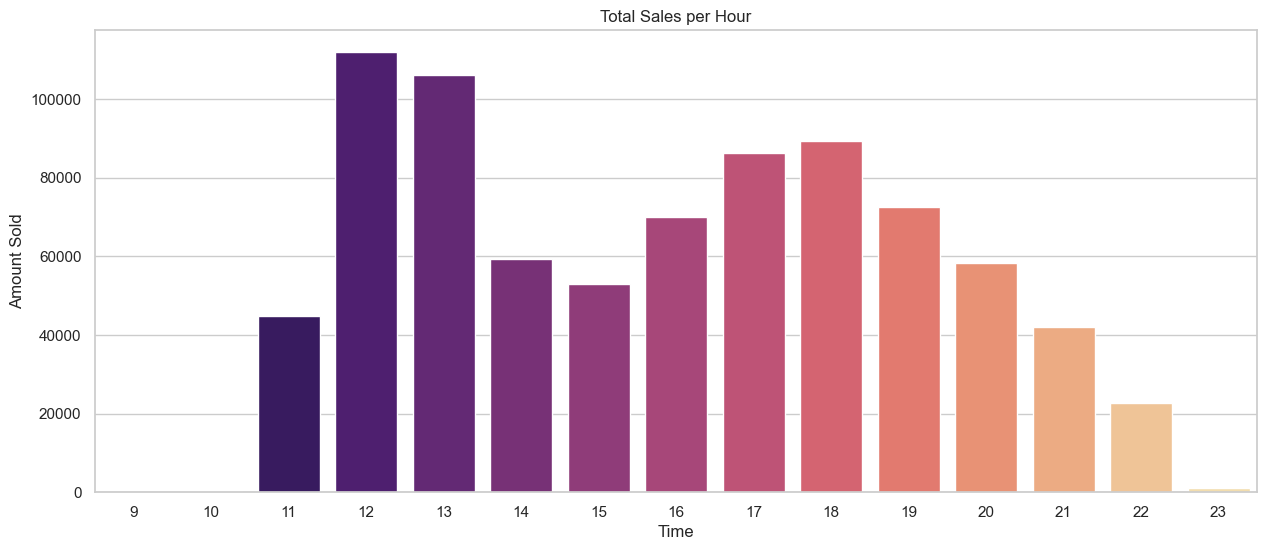

In [35]:
sns.set(style= "whitegrid")

plt.figure(figsize=(15,6))
sns.barplot(x=hourly_sales.index, y=hourly_sales.values, palette='magma')
plt.title("Total Sales per Hour")
plt.xlabel('Time')
plt.ylabel('Amount Sold')
plt.show()

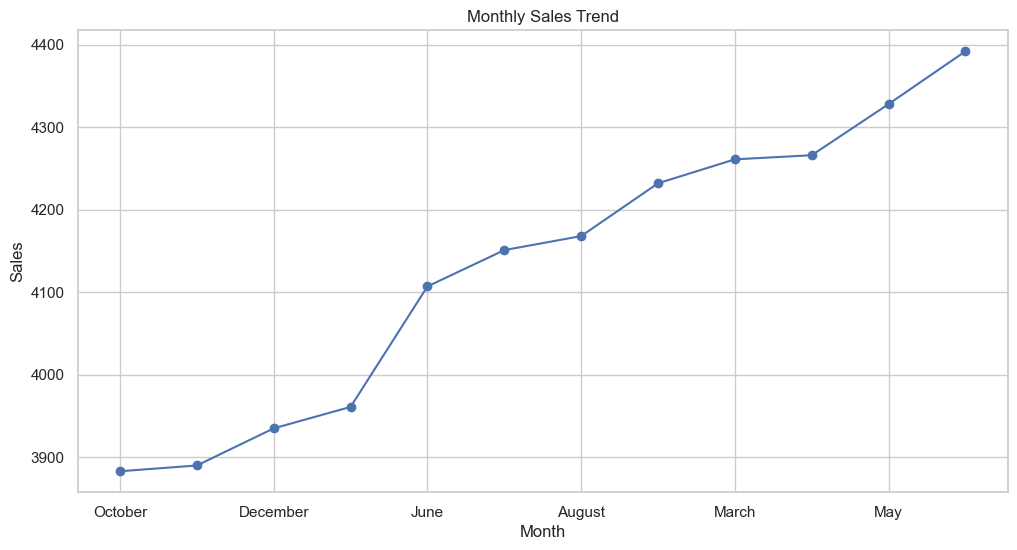

In [57]:
#Monthly sales trend 
# Plot
monthly_sales.plot(kind='line', marker='o', figsize=(12,6))
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.show()

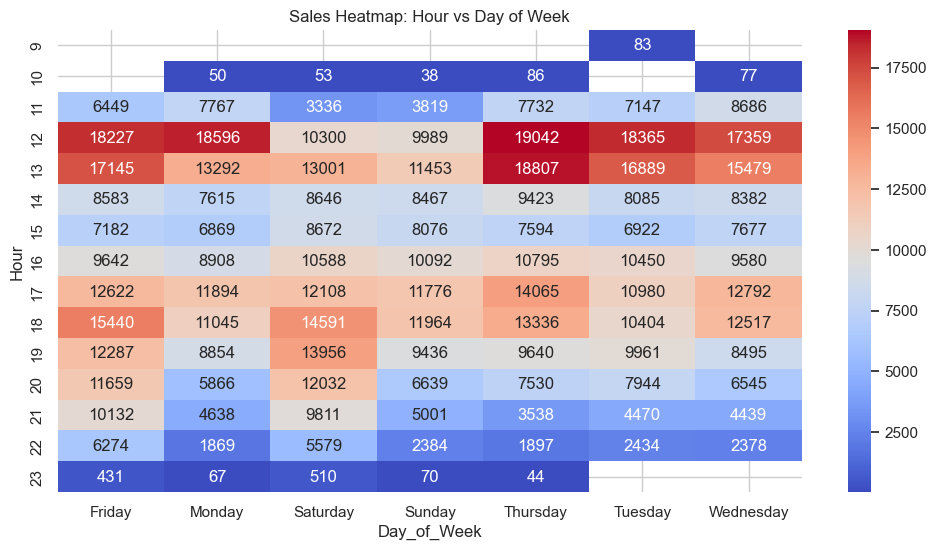

In [37]:
#Hourly vs Day Heatmap

hour_day_sales = final_df.pivot_table(values="Total", index="Hour", columns="Day_of_Week", aggfunc="sum")
plt.figure(figsize=(12,6))
sns.heatmap(hour_day_sales, cmap="coolwarm", annot=True, fmt=".0f")
plt.title("Sales Heatmap: Hour vs Day of Week")
plt.show()